In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/anujvyas/Natural-Language-Processing-Projects/master/Spam%20SMS%20Classification/dataset/Spam%20SMS%20Collection',sep='\t', names=['label', 'message'])
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data analysis

In [3]:
# no of missing values Nan
data.shape

(5572, 2)

In [4]:
data.columns

Index(['label', 'message'], dtype='object')

In [5]:
data.dtypes

label      object
message    object
dtype: object

In [6]:
data.describe(include='object')

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
data.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [9]:
# mapping values for labels
data['label'] = data['label'].map({'ham':0,'spam':1})
data.tail()

,label,message
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


In [10]:
## import essentail libraries for visulaize
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'count for spams vs hams as imbalanced data')

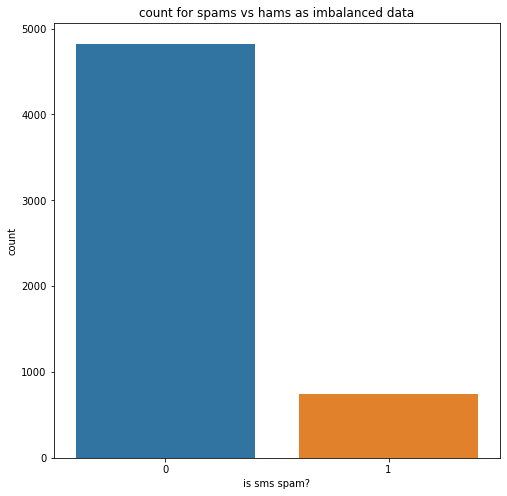

In [11]:
## countplot for ham vs spam as imbalanced data

plt.figure(figsize = (8,8))
g = sns.countplot(x='label' , data = data)
plt.xlabel("is sms spam?")
plt.ylabel("count")
plt.title("count for spams vs hams as imbalanced data")

$$ From the above figure it is clearly says that imbalanced data

## Feature Engineering
$$$$ Handling imbalanced data using oversampling
$$$$ creating new features e.g word_count, contains_currency_numbers,contains_numbers etc

In [12]:
only_spam = data[data['label']==1]
print('No of spam records: {}'.format(only_spam.shape[0]))
print('No of ham records: {}'.format(data.shape[0] - only_spam.shape[0]))

No of spam records: 747
No of ham records: 4825


In [13]:
count = int((data.shape[0]-only_spam.shape[0])/only_spam.shape[0])
count

6

In [14]:
for i in range(0,count-1):
    data = pd.concat([data,only_spam])
data.shape

(9307, 2)

Text(0, 0.5, 'count')

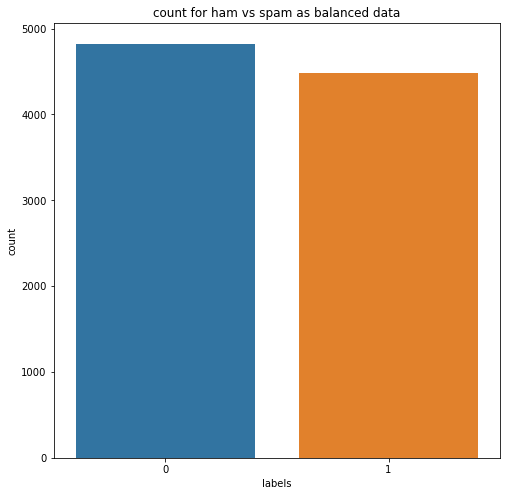

In [15]:
# countplot for ham vs spam as balanced data

plt.figure(figsize=(8,8))
sns.countplot(x='label',data=data)
plt.title("count for ham vs spam as balanced data")
plt.xlabel("labels")
plt.ylabel("count")

In [16]:
# create new fetaure
data['word_count'] = data['message'].apply(lambda x: len(x.split()))
data.head()

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13


C:\Users\SURESH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SURESH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


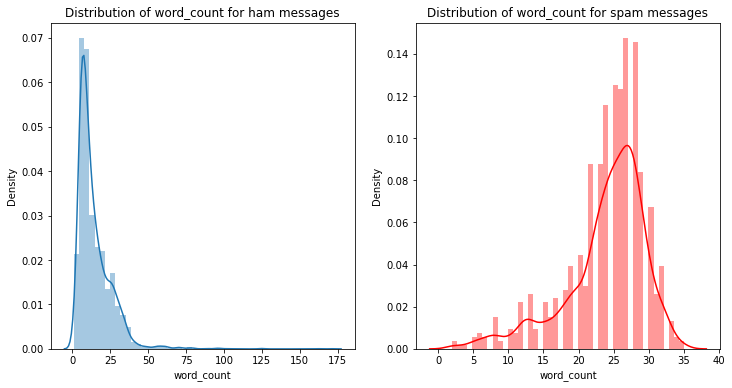

In [17]:
plt.figure(figsize= (12,6))

# 1-row,2-column,1st subplot 
plt.subplot(1,2,1)
g = sns.distplot(a=data[data['label']==0].word_count)
p = plt.title("Distribution of word_count for ham messages")

# 1-row,2-column, 2nd subplot
plt.subplot(1,2,2)
g = sns.distplot(a = data[data['label']==1].word_count, color='red')
p = plt.title("Distribution of word_count for spam messages")

plt.tight_layout
plt.show()

#### Here 15-30 words are comes under spam msgs and ham fall under 25 words


In [18]:
# creating curreny new feature
def currency(x):
    currency_symbols = ['€', '$', '¥', '£', '₹']
    for i in currency_symbols:
        if i in x:
            return 1
    return 0 
    
data['contains_currency_symbol'] = data['message'].apply(currency)

In [19]:
data.tail()

,label,message,word_count,contains_currency_symbol
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0
5567,1,This is the 2nd time we have tried 2 contact u...,30,1


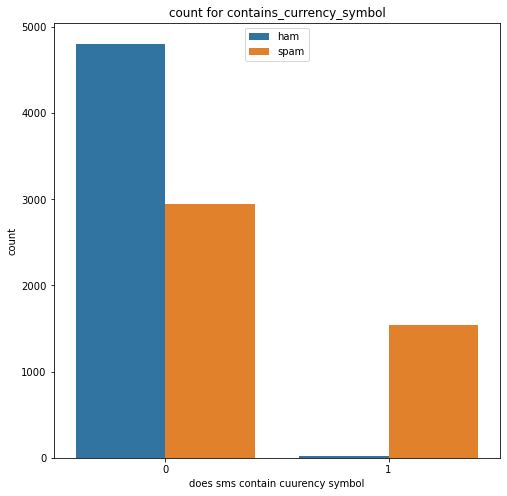

In [20]:
# countplot for contains_currency_symbol

plt.figure(figsize=(8,8))
sns.countplot(x='contains_currency_symbol',data=data,hue='label')
plt.title("count for contains_currency_symbol")
plt.xlabel("does sms contain cuurency symbol")
plt.ylabel("count")
plt.legend(labels = ['ham','spam'], loc=9)

In [21]:
# creating feature contains number
def numbers(x):
    for i in x:
        if ord(i)>=48 and ord(i)<=57:
            return 1
    return 0


data['contains_number'] = data['message'].apply(numbers)
data.head()

,label,message,word_count,contains_currency_symbol,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0


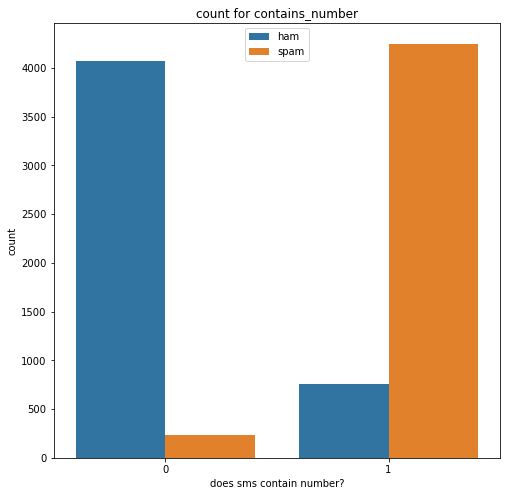

In [22]:
# countplot for contains_currency_symbol

plt.figure(figsize=(8,8))
sns.countplot(x='contains_number',data=data,hue='label')
plt.title("count for contains_number")
plt.xlabel("does sms contain number?")
plt.ylabel("count")
plt.legend(labels = ['ham','spam'], loc=9)

### Note : it is evident that most of the spam msgs have numbers and majority of ham dosnt have numbers

## Data Cleaning
- remove spl chars
- convert the entire sms into lower case
- tokensize the sms into words
- remove the stop words
* lemmatize the words
- join the lemmatize words
- build a corpus of words

In [23]:
# import essential library for performing nlp

import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SURESH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SURESH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [28]:
## cleaning the messages

corpus = []
wnl = WordNetLemmatizer()


for sms_string in list(data.message):
    
    #cleaning spl chars from sms
    message = re.sub(pattern ='[^a-zA-Z]', repl = ' ', string = sms_string)
        
    #converting the entire sms into lower case
    message = message.lower()
    
    #tokenize the sms by words
    words = message.split()
    
    #remove the stop words
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    
    #lemmatize the words
    lemmatize_words = [wnl.lemmatize(word) for word in filtered_words]
    
    #joining the lemmatize words
    message = ' '.join(lemmatize_words)
    
    # building a corpus message
    corpus.append(message)



In [32]:
# CREATING THE Bag of words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names()

# extract independent variables and dependent variables
X = pd.DataFrame(vectors,columns = feature_names)
y = data['label']


## Model Building & Evaluation

###### Metric - **F1
- Multiomial Navie Bayes - .94
- Desicion Tree - .98
- __Random Forest (Ensemble) - .99
- voting (Multiomial Naive Bayes + decision Tree): .98

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score


In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state =42)

In [37]:
# Fitting Naive Bayaes to the training data
from sklearn.naive_bayes import MultinomialNB
mnb  = MultinomialNB()
cv =cross_val_score(mnb,X,y,scoring = 'f1',cv =10)

print(' --- Average F1-score for MNB Model : {}'.format(round(cv.mean(),3)))
print('Standard deviation : {}'.format(round(cv.std(),3)))

 --- Average F1-score for MNB Model : 0.951
Standard deviation : 0.005


In [38]:
# calssification report for MNB Model
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.95      0.96      0.96       959
           1       0.96      0.95      0.95       903

    accuracy                           0.95      1862
   macro avg       0.95      0.95      0.95      1862
weighted avg       0.95      0.95      0.95      1862



Text(51.0, 0.5, 'predict values')

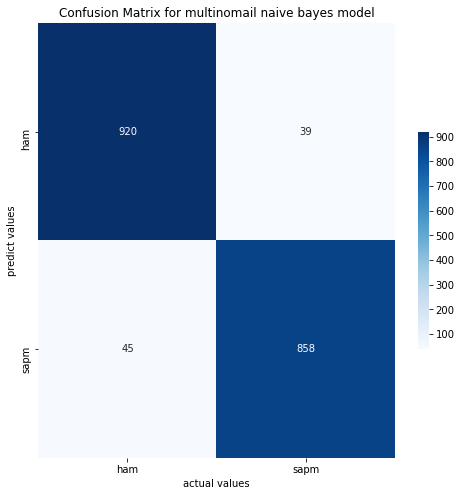

In [41]:
#confusion matrix
cm =confusion_matrix(y_test,y_pred)

plt.figure(figsize = (8,8))
axis_labels = ['ham','sapm']
g = sns.heatmap(data = cm, annot =True, cmap ='Blues', xticklabels =axis_labels, yticklabels = axis_labels , fmt = 'g',cbar_kws = {"shrink":0.5})
plt.title("Confusion Matrix for multinomail naive bayes model")
plt.xlabel("actual values")
plt.ylabel("predict values")

In [43]:
# Fitting Random Forest to Training data
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
cv = cross_val_score(dt,X,y,scoring = 'f1',cv=10)

print('--- avg F1-score for decision tree model: {}'.format(round(cv.mean(),3)))
print('standard deviation : {}'.format(round(cv.std(),3)))

--- avg F1-score for decision tree model: 0.981
standard deviation : 0.003


In [44]:
#classification report for Decision tree 
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       959
           1       0.97      1.00      0.98       903

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



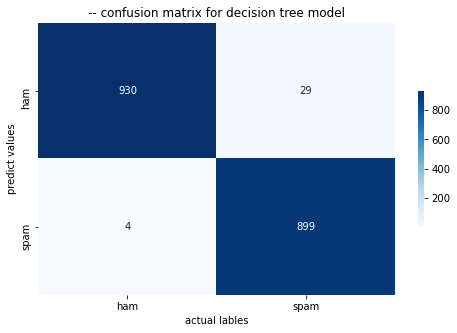

In [46]:
#confusion matrix for decision tree model
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (8,5))
axis_labels = ['ham', 'spam']

g = sns.heatmap(data= cm, cmap = 'Blues',annot =True , xticklabels = axis_labels,yticklabels = axis_labels,fmt = 'g',cbar_kws={"shrink":0.5})
p = plt.title("-- confusion matrix for decision tree model")
p = plt.xlabel("actual lables")
p = plt.ylabel("predict values")

In [47]:
# Fitting Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
cv = cross_val_score(rf,X,y,scoring = 'f1',cv=10)

print('--- avg F1-score for decision tree model: {}'.format(round(cv.mean(),3)))
print('standard deviation : {}'.format(round(cv.std(),3)))

--- avg F1-score for decision tree model: 0.994
standard deviation : 0.002


In [48]:
#classification report for Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       959
           1       0.99      1.00      0.99       903

    accuracy                           0.99      1862
   macro avg       0.99      0.99      0.99      1862
weighted avg       0.99      0.99      0.99      1862



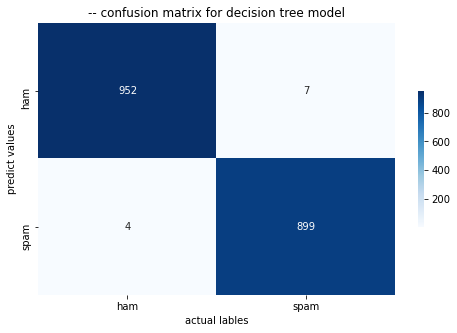

In [49]:
#confusion matrix for Random Forest Classifier
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (8,5))
axis_labels = ['ham', 'spam']

g = sns.heatmap(data= cm, cmap = 'Blues',annot =True , xticklabels = axis_labels,yticklabels = axis_labels,fmt = 'g',cbar_kws={"shrink":0.5})
p = plt.title("-- confusion matrix for decision tree model")
p = plt.xlabel("actual lables")
p = plt.ylabel("predict values")

In [50]:
# Fitting Decision Tree and MNB to VotingClassifier
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier([('decision_tree', dt), ('m_naive_bayes', mnb)], weights=[2,1])
cv = cross_val_score(vc, X, y, cv=10, scoring='f1')

print('--- Average F1-Score for VotingClassifier model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for VotingClassifier model: 0.98 ---
Standard Deviation: 0.003


## Making Predictions

- Note: Voting algorithm did not out-perform Random Forest algorithm, hence Random Forest algorithm is selected for predicting the results of this problem statement.
- Voting classifier to inc f1 score

In [52]:
def Predict_spam(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]',repl = ' ',string = sample_message)
    sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    final_message = [wnl.lemmatize(word) for word in sample_message_words]
    final_message = ' '.join(final_message)

    temp = tfidf.transform([final_message]).toarray()
    return rf.predict(temp)

In [54]:

# Prediction 1 - Lottery text message
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if Predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

Gotcha! This is a SPAM message.


In [56]:
# Prediction 2 - Casual text chat
sample_message = 'Came to think of it. I have never got a spam message before.'

if Predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


In [57]:
# Prediction 3 - Transaction confirmation text message
sample_message = 'Sam, your rent payment for Jan 19 has been received. $1,300 will be drafted from your Wells Fargo Account ******0000 within 24-48 business hours. Thank you!'

if Predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


In [58]:
# Predicting values 4 - Feedback message
sample_message = 'Tammy, thanks for choosing Carl’s Car Wash for your express polish. We would love to hear your thoughts on the service. Feel free to text back with any feedback. Safe driving!'

if Predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

Gotcha! This is a SPAM message.
